# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

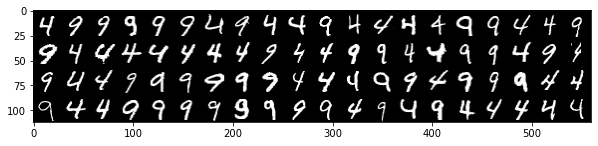

In [4]:
show_digit(X)

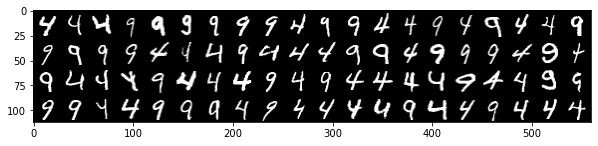

In [6]:
# Do feature normalization here
# begin answer
def normalize(x):
    average = np.average(x, axis=1).reshape(x.shape[0], 1)
    std = np.std(x, axis=1).reshape(x.shape[0], 1)
    std[std == 0] = 1.0
    return (x - average) / std

X_normal = normalize(X)
show_digit(X)
# end answer

### Ridge Regression and LOOCV

In [13]:
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val, E_err = 0, 0
    choose_arr = [True] * (X.shape[1])
    for j in range(X.shape[1]):
        choose_arr[j] = False
        X_ = X_normal[:, choose_arr]
        y_ = y[:, choose_arr]
        choose_arr[j] = True
        w = ridge(X_, y_, lmbdas[i])
        predition = y[:, j] * np.dot(np.squeeze(w), np.concatenate((np.array([1]), X_normal.T[j]), axis = 0))
        if predition <= 0:
            E_err += 1
        E_val += (y[:, j] - np.matmul(np.squeeze(w), np.concatenate((np.array([1]), X_normal.T[j]), axis = 0))) ** 2    

    # Update lmbda according validation error
    # begin answer
    E_err /= X.shape[1]
    E_val /= X.shape[1]
    print (lmbdas[i], "Average validation error:", E_err)
    print (lmbdas[i], "Average validation variance:", E_val)
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer
    
# Compute training error

# Do feature normalization to X_test, y_test
# ...
# Compute test error

0.001 Average validation error: 0.11
0.001 Average validation variance: [0.54211448]
0.01 Average validation error: 0.11
0.01 Average validation variance: [0.54149283]
0.1 Average validation error: 0.11
0.1 Average validation variance: [0.53543683]
0.0 Average validation error: 0.11
0.0 Average validation variance: [0.53364662]
1.0 Average validation error: 0.11
1.0 Average validation variance: [0.48737058]
10.0 Average validation error: 0.06
10.0 Average validation variance: [0.33829825]
100.0 Average validation error: 0.04
100.0 Average validation variance: [0.23433591]
1000.0 Average validation error: 0.035
1000.0 Average validation variance: [0.32183157]


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [15]:
from logistic_r import logistic_r

lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val, E_err = 0, 0
    choose_arr = [True] * (X.shape[1])
    for j in range(X.shape[1]):
        choose_arr[j] = False
        X_ = X_normal[:, choose_arr]
        y_ = y[:, choose_arr]
        choose_arr[j] = True
        w = logistic_r(X_, y_, lmbdas[i])
        #predition = y[:, j] * np.dot(np.squeeze(w), np.concatenate((np.array([1]), X_normal.T[j]), axis = 0))
        #t = y * np.dot(np.squeeze(w.T), np.concatenate((np.ones((1, X.shape[1])), X_normal), axis = 0))
        if predition <= 0:
            E_err += 1
        E_val += (y[:, j] - np.matmul(np.squeeze(w), np.concatenate((np.array([1]), X_normal.T[j]), axis = 0))) ** 2 
        
    # Update lmbda according validation error
    # begin answer
    E_err /= X.shape[1]
    E_val /= X.shape[1]
    print (lmbdas[i], "Average validation error:", E_err)
    print (lmbdas[i], "Average validation variance:", E_val)
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer

/Users/randomstar/Desktop/machine_learning/hw2/ml2020fall_hw2/regularization-cross-validation/logistic_r.py:20: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-np.squeeze(np.matmul(theta.T, x))))


0.001 Average validation error: 0.0
0.001 Average validation variance: [280325.05985779]
0.01 Average validation error: 0.0
0.01 Average validation variance: [274518.11602675]
0.1 Average validation error: 0.0
0.1 Average validation variance: [222998.9997261]
0.0 Average validation error: 0.0
0.0 Average validation variance: [280982.7019017]
1.0 Average validation error: 0.0
1.0 Average validation variance: [23306.55894094]
10.0 Average validation error: 0.0
10.0 Average validation variance: [100.75899061]
100.0 Average validation error: 0.0
100.0 Average validation variance: [5.10669623e+14]
1000.0 Average validation error: 0.0
1000.0 Average validation variance: [6.45244519e+46]
